In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Aufgabe 1 Grid Search

<p style="background-color:#f6f6f6;border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
   In dieser Übung werden wir uns mit einer Methode zur bestimmung von optimalen Hyperparamtern beschäftigen. In Aufgabe 2 und 3 werden wir uns neuronale Netzwerke vertieft anschauen. </p>

<p style="background-color:#f6f6f6;border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Wichtigste neuen Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente der Funktion darlegt und ihre Funktionalität beschreibt. <br>
    <b>Funktionen zur statistischen Analyse: </b><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV(...)</a><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline(...)</a><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression(...)</a><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">PolynomialFeatures(...)</a><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split(...)</a><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">MLPClassifier(...)</a><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score(...)</a><br>
</p>

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In der ersten Aufgabe werden wir mit linearer Regression ein Polynom an einen Datensatz fitten. Dabei verwenden wir Gridsearch, um die optimalen Hyperparameter für diese verwendete Modellklasse zu finden, mit denen die Daten weder unterfittet noch überfittet werden. In diesem Fall ist die Modellklasse die Menge aller Polynome beliebigen Grades und der einzige Hyperparameter ist der Grad des Polynoms. Der Gridsearch-Algorithmus fittet die Daten für verschiedene Hyperparameter in einem vorgegebenen Bereich und bestimmt mithilfe von cross validation den besten Fit und damit die besten Hyperparameter.

## a)

Verwenden Sie pandas, um das Dataset `Data_1/data.csv` in einem Dataframe `df` zu laden. Der Datensatz besteht aus zwei Spalten `x` und `y`, wobei `y(x)` ein Polynom ist. Erstellen Sie zwei Dataframes `X` und `y`, die diese beiden Spalten enthalten. Beachten Sie, dass `X` für die Weiterverarbeitung ein 2D-Array sein muss, auch wenn dieses hier nur eine Spalte enthält (Sie können `np.reshape` verwenden, um das Array in die richtige Form zu bringen).

Schauen Sie sich die Daten zuerst an, indem Sie sie plotten.

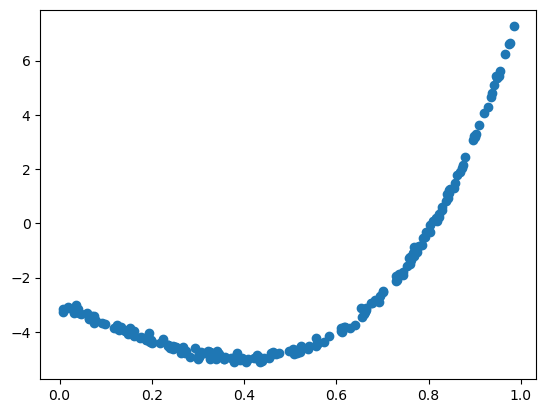

In [7]:
df=pd.read_csv('Data_1/data.csv')
X=df['x']
y=df['y']
plt.plot(X,y,'o')

##  b)

Um das Gridsearch durchzuführen, definieren wir eine Pipeline, welche die Schritte für den ganzen Ablauf des Fittens mit einem fixen Satz Hyperparameter enthält:

```python
polynom = Pipeline([("transf", PolynomialFeatures()), ("lr", LinearRegression())])
```

Der erste Schritt, `PolynomialFeatures`, wandelt den Input `x` in ein Polynoml n-ten Grades um. Dieses wird anschliessend im zweiten Schritt mit linearer Regression gefittet.

Als nächstes müssen wir einen Bereich von Hyperparametern definieren, über den wir iterieren wollen. Der relevante Hyperparameter, nämlich der Grad des Polynoms, wird durch das Argument `degree` bestimmt, das an `PolynomialFeatures` übergeben wird. Wir teilen dies dem Gridsearch-Algorithmus mit, indem wir ein <a href='https://docs.python.org/3/tutorial/datastructures.html#dictionaries'>Dictionary</a> `params` mit einem Eintrag `'transf__degree'` definieren. Der String setzt sich aus dem Namen des Schritts in der Pipeline und dem Namen des Arguments, das wir variieren möchten, zusammen.

```python
params = {'transf__degree': <Liste von Hyperparametern>}
```

Nun können wir das Gridsearch-Modell `GridSearchCV` erstellen (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>Dokumentation</a>). Die relevanten Argumente sind `estimator` (die Fit-Pipeline), `param_grid` (das Dictionary mit den Hyperparameter-Bereichen) und `cv` (Anzahl cross-validation Aufteilungen).

Wie Sie es aus Übung 12 kennen, können Sie mit der Funktion `fit()` den Fit ausführen. Anschliessend definieren Sie ein Array von x-Werten zwischen 0 und 1, auf denen Sie das Resultat mit `predict` verifizieren können. Achten Sie darauf, dass `predict()` ein 2D-Array erwartet (hier mit einer Spalte; verwenden Sie `np.reshape`). Plotten Sie die Datenpunkte zusammen mit den Voraussagen, um zu überprüfen, ob das Modell stimmt.

Inspizieren Sie auch die Resultate des Gridsearch-Crossvalidierungsverfahrens: Die besten Hyperparameter sind im Attribut `best_params_` gespeichert. Die volle Information über die Scores der Fits mit verschiedenen Parametern finden Sie in `cv_results_`.

{'transf__degree': 6}


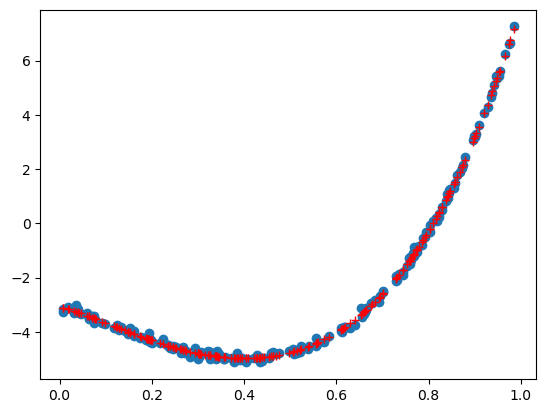

In [14]:
polynom = Pipeline([("transf", PolynomialFeatures()), ("lr", LinearRegression())])
params = {'transf__degree': np.arange(1,10)}
regr=GridSearchCV(estimator=polynom,param_grid=params).fit(np.reshape(X,(-1,1)),y)
print(regr.best_params_)
#print(regr.cv_results_)
plt.plot(X,y,'o')
plt.plot(X,regr.predict(np.reshape(X,(-1,1))), '+r')

## c)

Verwenden Sie das Fitresultat, um die `y`-Werte für alle `x`-Werte aus der Datei `Data_1/X_final.csv` vorherzusagen. Stellen Sie die Voraussagen grafisch dar und vergleichen Sie mit dem Plot aus b).

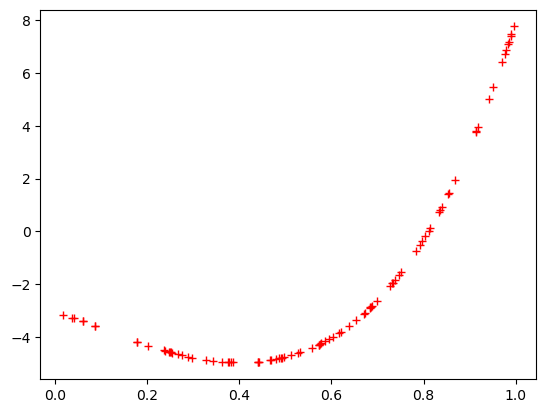

In [15]:
df_final=pd.read_csv("Data_1/X_final.csv")
X_final=df_final['x']
plt.plot(X_final,regr.predict(np.reshape(X_final,(-1,1))), '+r')

# Aufgabe 2 Neuronale Netze

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In der zweiten Aufgabe implementieren wir ein Programm, das neuronale Netze verwendet, um Punkten auf den beiden 
Armen einer Doppelspirale zu unterscheiden.

## a)

Laden Sie zuerst die Datei `Data_2/data.csv` in ein Dataframe. Jede Zeile der Tabelle bezeichnet einen Punkt, wobei die ersten beiden Spalten die Koordinaten des Punktes sind und die letzte Spalte `y` angibt, auf welchem Arm der Spirale der Punkt liegt.

Erstellen Sie zwei Dataframes `X` und `y`. Dabei soll `y` nur die Zuordnung der Punkte zu Spiralarmen enthalten und `X` die beiden andern Spalten.

Stellen Sie die Werte grafisch dar, indem Sie `X` Werte als Koordinaten in einem Scatterplot plotten (`ax.scatter`). Verwenden Sie dabei die `y`, um die Farbe der Punkte zu bestimmen. Das Ziel des Netzwerkes ist es, die Punkte richtig den beiden Spiralen bzw. Farben zuzuweisen. 

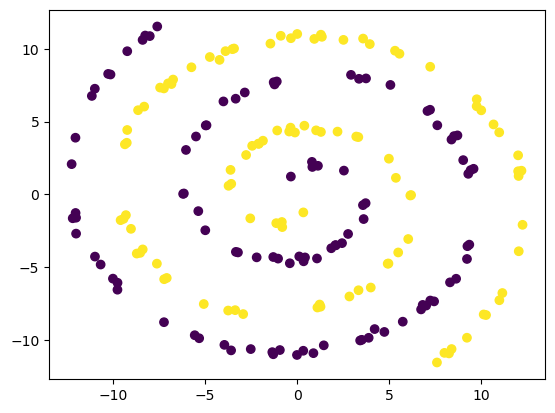

In [19]:
df2=pd.read_csv("Data_2/data.csv")
X=df2[['X1','X2']]
y=df2['y']
plt.scatter(X['X1'],X['X2'], c=y)

## b)

Teilen Sie `(X, y)` in einen Trainingsdatensatz `(X_train, y_train)` und einen Testdatensatz `(X_test, y_test)` auf. Benutzen Sie `MLPClassifier` (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier'>Dokumentation</a>) um ein neuronales Netzwerk zu erstellen, und trainieren Sie es dann mit dem Trainingsdatensatz. Die relevanten Argumente sind:

- max_iter
- hidden_layer_sizes
- random_state (int): Falls Sie den Zufallsgenerator immer gleich initialisieren wollen, um reproduzierbare Resultate zu erhalten.

Limitieren Sie die Anzahl der Iterationen auf 5000, und probieren Sie verschiedene Anzahl hidden layers mit verschiedenen Anzahlen von Neuronen aus, um das beste Resultat zu erhalten.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
clf=MLPClassifier(hidden_layer_sizes=(5,5), max_iter=5000, random_state=42).fit(X_train,y_train)


## c)

Verwenden Sie das resultierende neuronale Netz, um die Punkte in `X_test` zu klassifizieren und bewerten Sie die Genauigkeit der getroffenen Vorhersagen gegenüber `y_test` mit der Funktion `accuracy_score`.

## d)

Verwenden Sie Pandas, um den Datensatz `X_final.csv` in einem Dataframe `df` zu laden.

Der Datensatz enthält nun die Koordinaten der Punkte ohne ihre Zuordnung. Verwenden Sie das trainierte Netzwerk, um die Punkte den Spiralarmen zuzuordnen, und plotten Sie das Resultat.

# Aufgabe 3: Propagation durch ein neuronales Netz

In der letzten Aufgabe sollen Sie die Propagation durch die hidden Layers eines neuronalen Netzes selber implementieren. In jedem Layer nimmt jedes der $M$ Neuronen die $N$ Inputs, multipliziert jeden davon mit einem Gewicht und bildet dann die Summe. Dies entspricht einer linearen Abbildung eines $N$-Dimensionalen Inputvektors auf $M$ Neuronen, was wiederum als Multiplikation des Inputvektors mit einer $(M\times N)$-Matrix aufgefasst werden kann. In jedem Neuron wird dann zu der Summe noch ein Offset oder Bias addiert und dann wird eine nichtlineare Aktivierungsfunktion darauf angewendet. Diese $M$ Zahlen sind der Output dieses Layers, der als Input an das nächste Layer übergeben wird. 

## a)

Schreiben Sie zuerst zwei Funktionen, die ein einzelnes hidden Layer mit einer ReLU- bzw. einer Sigmoid-Aktivierungsfunktion implementieren. Die Argumente der Funktion sind:

- $N$-dimensionaler Inputvektor (1D-Array mit N Einträgen)
- $(M\times N)$-Gewichtsmatrix ($N$ Gewichte für jedes der $M$ Neuronen)
- $M$-dimensionaler Biasvektor (ein Biaswert für jedes der $M$ Neuronen)

Der Rückgabewert ist ein $M$-dimensionaler Vektor mit den Outputs aller Neuronen.

Für die Matrixmultiplikation  können Sie `np.dot` oder `@` verwenden.

## b)

Nutzen Sie das im nächsten Abschnitt gegebene Testarray zusammen mit der gegebenen Gewichtsmatrix und des Biasvektors um ihre Funktionen zu überprüfen. Vergleichen Sie Ihre ergebnisse mit den Resultaten, die wir Ihnen zur Verfügung stellen.

In [4]:
testarray = np.arange(1, 5)

weight = np.ones((3, 4))
bias = np.array([0, -10, -12])

result_ReLU = np.array([10, 0, 0])
result_sigmoid = np.array([0.9999546, 0.5, 0.11920292])

# Ihr Code

## c) 

Schreiben Sie nun eine Funktion, die die Funktionen aus a) zu einem Netzwerk zusammenfügt. Die Inputs sind:

- input_vector: 1D-Array mit den Inputs für das erste Layer.
- weights: eine Liste mit k-Einträgen, wobei k die Anzahl hidden Layers ist. Jeder Eintrag enthält die Gewichtsmatrix für das entsprechende Layer.
- biases: eine Liste mit k-Einträgen. Jeder Eintrag enthält den Biasvektor für das entsprechende Layer.

Die Funktion iteriert durch alle Layers und propagiert immer den Output des vorigen Layers durch das nächste Layer. Verwenden Sie für alle Layers ausser dem allerletzten die ReLU-Aktivierungsfunktion. Für das letzte Layer verwenden Sie die Sigmoid-Aktivierungsfunktion.

Für einen Classifier will man einen binären Output, 0 oder 1. Da die Sigmoid-Aktivierungsfunktion auch Werte zwischen 0 und 1 zurückgibt, müssen Sie diese noch mit `np.round` auf 0 oder 1 runden.

*Bemerkung: Die Argumente `weights` und `biases` müssen python-Listen anstelle von Numpy-Arrays sein, da diese Einträge unterschiedlichen Typs haben können, z.B.:*
```python
liste = ['a', 2, np.array([2, 5])]
```

## d)

Mit der Funktion in b) haben sie schon die `predict`-Funktion für einen NN-Classifier implementiert! Das Trainieren des Netzwerks, also das Optimieren der Gewichtsmatrizen und Biasvektoren, ist deutlich aufwendiger und übersteigt den Umfang dieser Übung.

Allerdings können wir unsere Implementation auf Klassifizierungsprobleme anwenden, wenn wir das Resultat des Trainings, also die Gewichtsmatrizen und Biasvektoren, kennen.

Der Datensatz `Data_3/data.csv` enthält ähnlich zu Aufgabe 2 zwei Spalten, die den x- und y-Koordinaten von Punkten entsprechen. Die Punkte können in einen inneren Kreis und einen äusseren Ring aufgeteilt werden.

Laden Sie den Datensatz in eine Dataframe und plotten Sie die Punkte auf einem Scatterplot. 

## e)

Benutzen Sie nun Ihre Funktion mit den bereitgestellten Gewichtsmatrizen und Biasvektoren, um für jeden Punkt eine Vorhersage zu treffen, ob er in der inneren oder der äusseren Menge liegt. 

Analog zur Spirale können Sie das Resultat in einem Scatterplot darstellen und die Vorhersage als Farbwert übergeben.

In [5]:
weights = pickle.load(open('Data_3/weights.p', 'rb'))
biases = pickle.load(open('Data_3/biases.p', 'rb'))

# Ihr Code